In [62]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [63]:
df = pd.read_csv('all_matches.csv')

In [64]:
df.shape

(260920, 22)

In [65]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [66]:
df.shape

(260759, 22)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260759 entries, 0 to 260919
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                260759 non-null  int64  
 1   season                  260759 non-null  object 
 2   start_date              260759 non-null  object 
 3   venue                   260759 non-null  object 
 4   innings                 260759 non-null  int64  
 5   ball                    260759 non-null  float64
 6   batting_team            260759 non-null  object 
 7   bowling_team            260759 non-null  object 
 8   striker                 260759 non-null  object 
 9   non_striker             260759 non-null  object 
 10  bowler                  260759 non-null  object 
 11  runs_off_bat            260759 non-null  int64  
 12  extras                  260759 non-null  int64  
 13  wides                   8376 non-null    float64
 14  noballs                 1

In [68]:
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [69]:
csk_df = df[df['batting_team'] == 'Chennai Super Kings']

In [70]:
len(csk_df.striker.unique())

76

In [71]:
dho_df = csk_df[csk_df.striker == 'MS Dhoni']

In [72]:
balls = len(dho_df)

In [84]:
#Get overall runs and strike rate, Balls faced = 3466
total_runs = sum(dho_df.runs_off_bat)
total_runs

4669

In [86]:
total_csk = sum(csk_df.runs_off_bat)
sum(csk_df.runs_off_bat)

36730

In [88]:
percent_contribution = 100*total_runs/total_csk
percent_contribution

12.711679825755514

In [74]:
100*total_runs/balls

134.70859780727062

In [75]:
total_innings=len(dho_df.match_id.unique())

In [76]:
RPI = total_runs/total_innings

In [77]:
RPI

23.228855721393035

In [78]:
# Comparing this for last 2 years
dho_df_new = dho_df[(dho_df.season == 2023) | (dho_df.season == 2024)]

In [89]:
csk_df_new = csk_df[(csk_df.season == 2023) | (csk_df.season == 2024)]

In [79]:
new_balls = len(dho_df_new)

In [95]:
total_runs_new = sum(dho_df_new.runs_off_bat)
total_runs_new

265

In [93]:
total_runs_csk = sum(csk_df_new.runs_off_bat)

In [96]:
100*total_runs_new/total_runs_csk

5.294705294705294

In [81]:
100*total_runs_new/new_balls

182.75862068965517

In [82]:
total_innings_new=len(dho_df_new.match_id.unique())

In [83]:
total_runs_new/total_innings_new

11.521739130434783

| Category | Overall | 2023 and 2024 |
| --- | --- | --- |
| Total Runs | 4669 | 265 |
| SR         |134   |182  |
| RPI        |23.22 |11.52|
|% Team Runs |12.71 |5.29 |

# We can see that in the last couple of years Dhoni has only one thing that looks good. His Strike rate. His RPI has halved and his total run percentage to team score has more than halved.

In [99]:

# Group by player and calculate total runs and balls faced
player_stats = csk_df_new.groupby('striker').agg(
    total_runs=('runs_off_bat', 'sum'),
    balls_faced=('ball', 'count')
)

# Calculate strike rate
player_stats['strike_rate'] = (player_stats['total_runs'] / player_stats['balls_faced']) * 100


player_stats = player_stats[player_stats['balls_faced'] >= 50]

In [100]:
player_stats.sort_values(by='total_runs', ascending=False)

,total_runs,balls_faced,strike_rate
striker,,,
RD Gaikwad,1173,836,140.311005
S Dube,814,536,151.865672
DP Conway,672,493,136.308316
AM Rahane,568,393,144.529262
RA Jadeja,457,329,138.905775
DJ Mitchell,318,228,139.473684
MS Dhoni,265,145,182.758621
MM Ali,252,197,127.918782
R Ravindra,222,146,152.054795


In his team he stands as the 7th highest run getter. But he has the advantage of having played lot of matches.

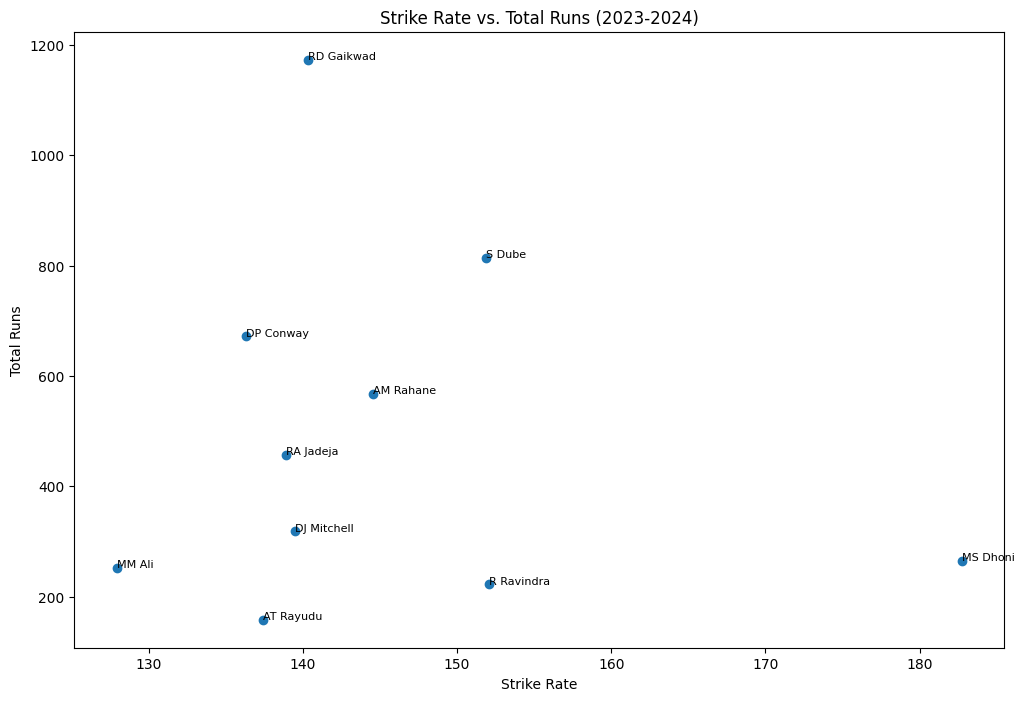

In [101]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plt.scatter(player_stats['strike_rate'], player_stats['total_runs'])
plt.xlabel('Strike Rate')
plt.ylabel('Total Runs')
plt.title('Strike Rate vs. Total Runs (2023-2024)')

# Annotate points with player names
for i, row in player_stats.iterrows():
    plt.annotate(i, (row['strike_rate'], row['total_runs']), fontsize=8)

plt.show()

In [104]:
# Group by player and calculate total runs and balls faced
df_new = df[(df.season == 2023) | (df.season == 2024)]
player_stats = df_new.groupby('striker').agg(
    total_runs=('runs_off_bat', 'sum'),
    balls_faced=('ball', 'count')
)

# Calculate strike rate
player_stats['strike_rate'] = (player_stats['total_runs'] / player_stats['balls_faced']) * 100


player_stats = player_stats[player_stats['balls_faced'] >= 50]
player_stats.sort_values(by='total_runs', ascending=False)

,total_runs,balls_faced,strike_rate
striker,,,
V Kohli,1380,970,142.268041
Shubman Gill,1316,877,150.057013
RD Gaikwad,1173,836,140.311005
F du Plessis,1168,759,153.886693
YBK Jaiswal,1060,685,154.744526
SA Yadav,950,549,173.041894
H Klaasen,927,555,167.027027
SV Samson,893,607,147.116969
B Sai Sudharsan,889,652,136.349693


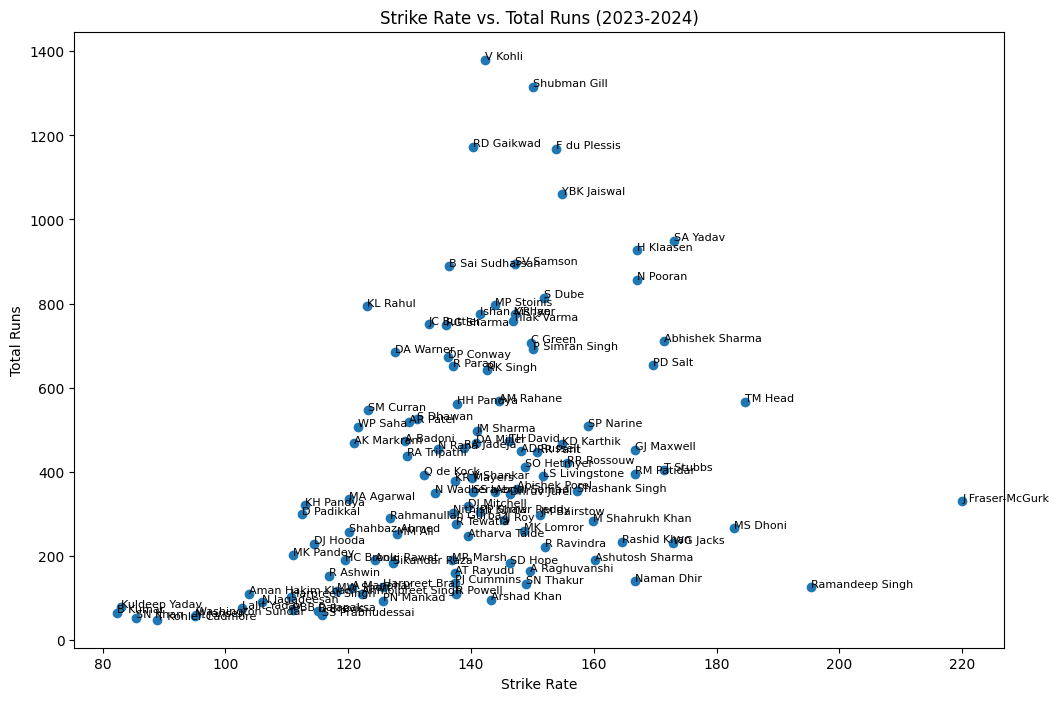

In [105]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plt.scatter(player_stats['strike_rate'], player_stats['total_runs'])
plt.xlabel('Strike Rate')
plt.ylabel('Total Runs')
plt.title('Strike Rate vs. Total Runs (2023-2024)')

# Annotate points with player names
for i, row in player_stats.iterrows():
    plt.annotate(i, (row['strike_rate'], row['total_runs']), fontsize=8)

plt.show()

The graph is a bit muddled, with all the annotations. But we can see clearly that Dhoni occupies a space with high strike rate. He is the 4th highest in terms of pure strike rate. In terms of statistics - Dhoni's only saving grace is his high strike rate in the past couple of years. In terms of runs and RPI, he has set a good standard in his overall career that the current recoed doesn't look good.